<a href="https://colab.research.google.com/github/rajansingh387/projects/blob/main/hdfc_bank_stock_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/hdfc bank stock timeseries


[Errno 2] No such file or directory: '/content/drive/MyDrive/hdfc bank stock timeseries'
/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HDFCBANK.NS.csv')

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.shape

(328, 7)

In [ ]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dropna(inplace= True)

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.value_counts()

Date        Open         High         Low          Close        Adj Close    Volume     
1996-01-01  3.030000     3.030000     2.395000     2.590000     2.077178     7640000.0      1
2013-02-01  322.399994   340.450012   309.674988   312.674988   291.626373   119612272.0    1
2014-08-01  413.024994   426.399994   395.700012   421.774994   400.023102   65539076.0     1
2014-07-01  411.500000   430.350006   403.575012   417.000000   395.494354   79829752.0     1
2014-06-01  396.750000   428.000000   396.750000   410.774994   386.322723   77783872.0     1
                                                                                           ..
2005-01-01  51.605000    57.000000    47.509998    56.459999    49.857109    106064210.0    1
2004-12-01  49.910000    52.994999    46.450001    52.035000    45.949608    88534810.0     1
2004-11-01  42.299999    50.439999    41.549999    49.669998    43.861195    75750040.0     1
2004-10-01  40.980000    82.360001    39.615002    41.509998    3

In [ ]:
data2= data.copy()

In [ ]:
data.drop(['Open','High','Low','Adj Close', 'Volume'], axis= 1, inplace = True)

In [ ]:
data.set_index('Date')

,Close
Date,
1996-01-01,2.590000
1996-02-01,3.065000
1996-03-01,3.245000
1996-04-01,3.545000
1996-05-01,3.415000
...,...
2022-11-01,1608.449951
2022-12-01,1628.150024
2023-01-01,1603.500000


(327, 2)


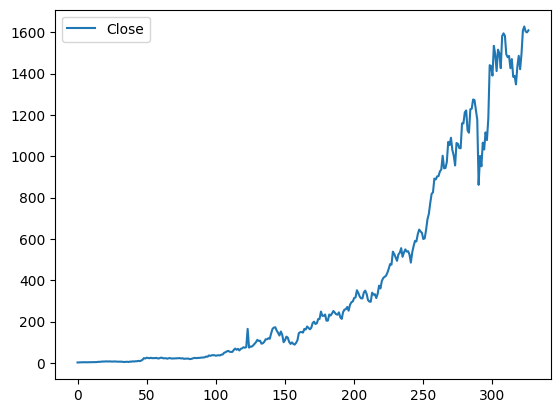

In [ ]:
data.plot(stacked= True)
print(data.shape)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
data.dtypes


Date      object
Close    float64
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date']) # Convert to datetime
data = data.set_index('Date')

In [ ]:
decom = seasonal_decompose(data)

observed = decom.observed
trend = decom.trend
seasonal = decom.seasonal

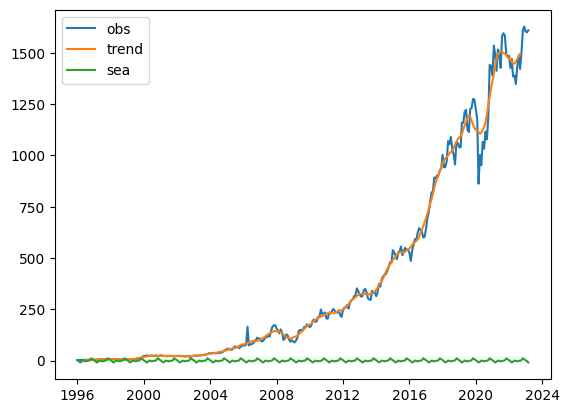

In [ ]:
plt.plot(observed, label= 'obs')
plt.plot(trend, label='trend')

plt.plot(seasonal, label= 'sea')
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(data):
  res= adfuller(data)
  print('teststat',res[0])
  print('pval',res[1])
  alpha = 0.05
  if res[1]>alpha:
        print('Ho is accepted : Data is not stationary')
  else:
        print('H1 is accepted : Data is stationary')

In [ ]:
adf_test(data)

teststat 4.043266737016729
pval 1.0
Ho is accepted : Data is not stationary


In [ ]:
adf_test(data.diff().dropna())

teststat -4.905321894494745
pval 3.4051993770617686e-05
H1 is accepted : Data is stationary


In [ ]:
data.shape

(327, 1)

In [ ]:
x= data.iloc[:250]
y= data.iloc[250:]

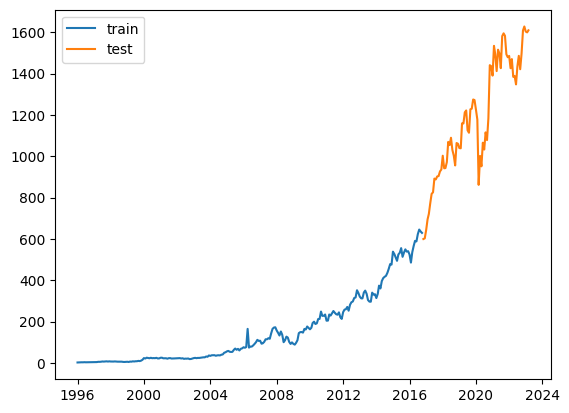

In [ ]:
plt.plot(x,label='train')
plt.plot(y,label='test')
plt.legend()
plt.show()

In [ ]:
def plotfcast(x,y,z):
  plt.plot(x,label='train')
  plt.plot(y,label='test')
  plt.plot(z,label='fcast')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
m1 = ARIMA(x,order= (1,1,1))
arima= m1.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y.shape

(27, 1)

In [ ]:
z= arima.forecast(77)

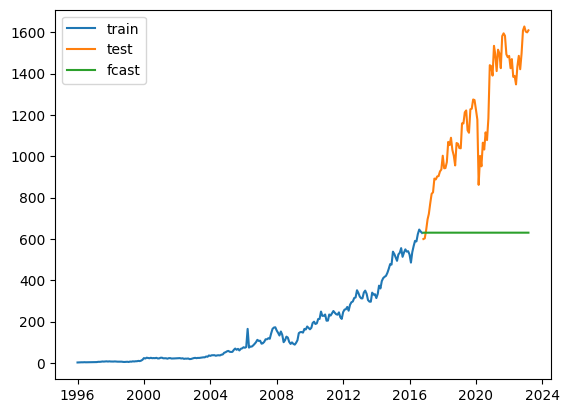

In [ ]:
plotfcast(x,y,z)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_arima_m1 = auto_arima(x,start_p=0,max_p=15,start_q=0,max_q=15,d=None,max_d=15,
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2269.146, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2187.325, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2068.488, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2063.529, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2061.943, Time=0.50 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2155.291, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2060.408, Time=0.59 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=2128.359, Time=0.23 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=2062.162, Time=0.65 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2062.298, Time=1.02 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2061.598, Time=0.46 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=2103.515, Time=0.13 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=2063.871, Time=0.68 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]  

In [ ]:
def custom_arima(p,d,q):
    model  = ARIMA(x,order=(p,d,q))
    ar_model = model.fit()
    fcast = ar_model.forecast(len(y))
    eval_model(y,fcast)
    plotfcast(x,y,fcast)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

MAE 114.74997817243516
MSE 16994.114383615266
RMSE 130.36147584165832


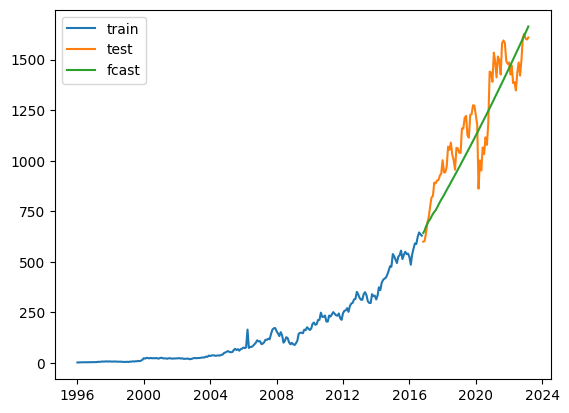

In [ ]:
custom_arima(10,3,1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE 302.09421328741485
MSE 113642.32463704035
RMSE 337.1087727085137


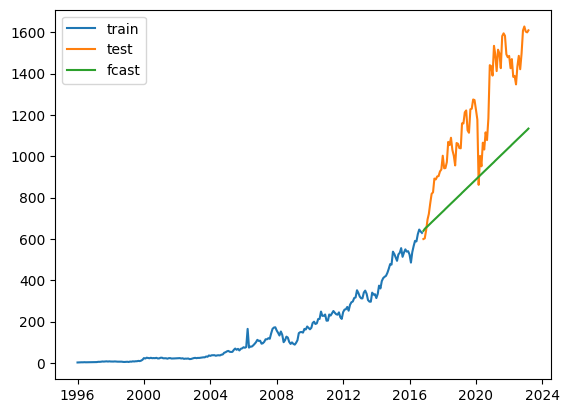

In [ ]:
custom_arima(3,2,1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

MAE 133.412368791714
MSE 23408.656773359216
RMSE 152.99887834019967


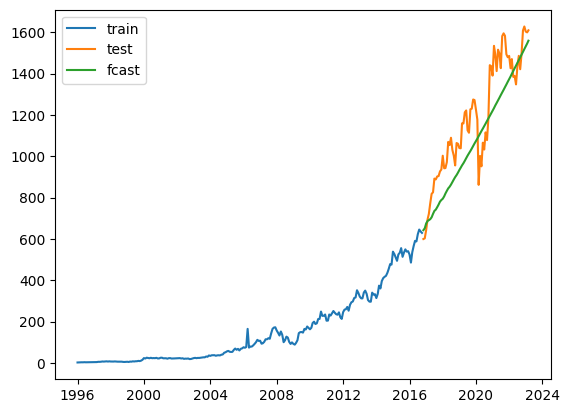

In [ ]:
custom_arima(16,3,1)

In [ ]:
import pandas as pd

# create a date range from January 1st, 2021 to December 31st, 2030
dates = pd.date_range(start='2023-04-01', end='2050-12-31', freq='MS')

# create a DataFrame with the dates as the only column
df = pd.DataFrame({'Date': dates})

# filter for the 1st day of each month
df = df[df['Date'].dt.day == 1]

# remove the time stamp
df['Date'] = df['Date'].dt.date

# add a Close column and set its value to 0
df['Close'] = 0

# set the Date column as the index
df.set_index('Date', inplace=True)

# print the DataFrame
print(df)


            Close
Date             
2023-04-01      0
2023-05-01      0
2023-06-01      0
2023-07-01      0
2023-08-01      0
...           ...
2050-08-01      0
2050-09-01      0
2050-10-01      0
2050-11-01      0
2050-12-01      0

[333 rows x 1 columns]


In [ ]:
print(df.head())

            Close
Date             
2023-04-01      0
2023-05-01      0
2023-06-01      0
2023-07-01      0
2023-08-01      0


In [ ]:
auto_arima_m1 = auto_arima(data,start_p=0,max_p=10,start_q=0,max_q=10,d=None,
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3579.246, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3459.361, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3317.980, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3312.853, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3314.478, Time=0.47 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3312.540, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3314.522, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=3316.331, Time=0.49 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 2.552 seconds


In [ ]:
data.tail()

,Close
Date,
2022-11-01,1608.449951
2022-12-01,1628.150024
2023-01-01,1603.500000
2023-02-01,1599.599976
2023-03-01,1609.550049


In [ ]:
df.head()

,Close
Date,
2023-04-01,0
2023-05-01,0
2023-06-01,0
2023-07-01,0
2023-08-01,0


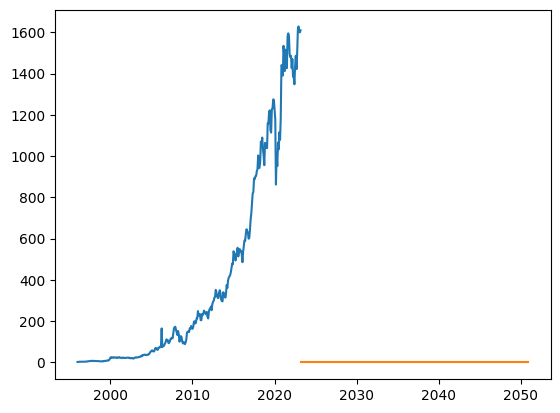

In [ ]:
plt.plot(data)
plt.plot(df)

In [ ]:
def custom_arima1(p,d,q):
    model  = ARIMA(data,order=(p,d,q))
    ar_model = model.fit()
    fcast = ar_model.forecast(len(df))
    eval_model(df,fcast)
    plotfcast(data,df,fcast)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

MAE 5149.107201714319
MSE 31865024.094769217
RMSE 5644.911345164706


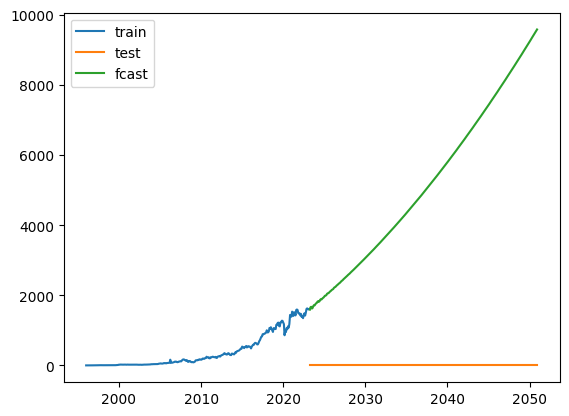

In [ ]:
custom_arima1(16,3,1)

In [ ]:
custom arima 'custom_arima1(16,3,1)' is the best suited

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE 3173.302643467601
MSE 10879982.111828031
RMSE 3298.481788918658


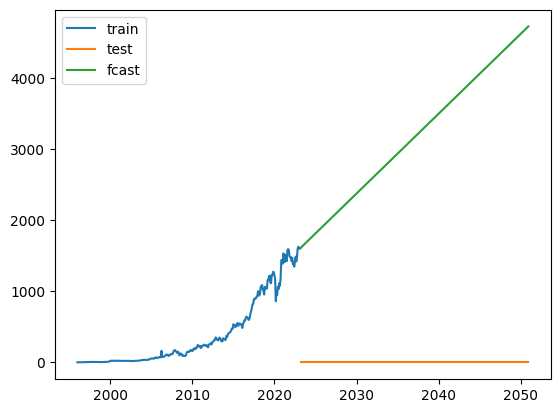

In [ ]:
custom_arima1(3,2,1)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE 1608.4608255115256
MSE 2587146.2272596764
RMSE 1608.4608255284543


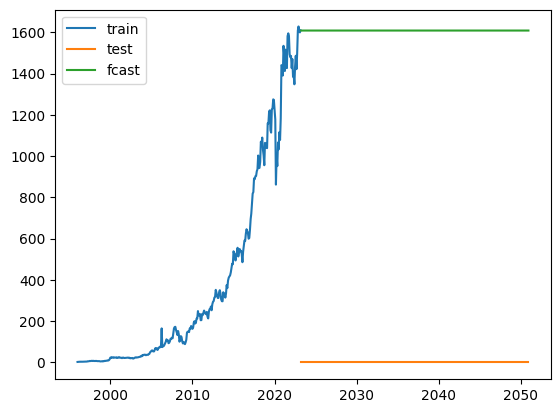

In [ ]:
custom_arima1(1,1,0)